# Chemical Representations and Introduction to RDKit

This notebook is inspired by and borrows from <a href = "https://weisscharlesj.github.io/SciCompforChemists/notebooks/chapter_015/chap_15_notebook.html"> Chapter 15: Cheminformatics with RDKit </a> from Charlie Weiss's book <a href ="https://weisscharlesj.github.io/SciCompforChemists/notebooks/introduction/intro.html">   Scientific Computing for Chemists with Python</a>, 
and  <a href = "https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/SMILES_tutorial.ipynb"> An Introduction to the Simplified Molecular Input Line Entry System (SMILES)</a> from Pat Walter's <a href="https://github.com/PatWalters/practical_cheminformatics_tutorials?tab=readme-ov-file"> Cheminformatics Tutorials Github.</a> 

<div class="alert alert-block alert-info">
<h2>Learning Objectives</h2>

* Explore Chemical Representations:
  - Line Notation (SMILES, InChI, InChIKey)
  - Connection Tables
  - Structural Data Files
* Explore RDKit
  - Visualizing molecules
  - Geometry Optimization
* Review PubChem's PUG REST Web Interface
  - Getting data from PubChem through PUG-REST
* Practice code from previous notebooks

</div>


## Introduction to SMILES and RDKit 

SMILES (Simplified Molecular Input Line Entry System) is a compact, text-based way to represent chemical structures using ASCII characters. Developed in the 1980s to encode molecular graphs for computers, SMILES captures atoms, bonds, branching, and ring structures in a linear string. While modern software can generate SMILES automatically, understanding how they work provides insight into how chemical information is stored, searched, and shared in databases and cheminformatics tools.

The [Daylight Theory Manual](https://www.daylight.com/dayhtml/doc/theory/) is the foundational reference for understanding how SMILES work. Created by the developers of the original SMILES system at Daylight Chemical Information Systems, this manual outlines the principles behind molecular graph representation, atom and bond encoding, and the syntax rules that govern how structures are translated into strings. 

The [Daylight SMILES Tutorial](https://www.daylight.com/dayhtml_tutorials/languages/smiles/index.html) is another valuable resource, offering a practical introduction to writing and interpreting SMILES. For those curious about the origin story and cultural quirks behind SMILES, this [Chemistry World](https://www.chemistryworld.com/opinion/weiningers-smiles/4014639.article) article provides an engaging look at its history and the chemist who created it.


[RDKit](https://rdkit.org/) is an open-source cheminformatics toolkit that makes it easy to work with chemical structures in Python. It allows you to read, manipulate, visualize, and analyze molecules using formats like SMILES, SDF, and more. With RDKit, you can generate 2D or 3D structures, calculate molecular properties, perform substructure searches, and integrate chemistry into data science workflows. It’s a powerful tool for anyone working at the intersection of chemistry and programming.

In [4]:
# this loads rdkit and allows us to draw molecules in the window
from rdkit import Chem  
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs



Let's start by obtaining the SMILES string for butane from PubChem

The SMILES string for butane is: CCCC



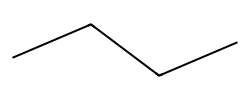

In [7]:
import requests
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/name/butane"
pugoper = "property/SMILES"
pugout  = "txt"
url     = "/".join( [pugrest, pugin, pugoper, pugout] )
res = requests.get(url)
print("The SMILES string for butane is:", res.text)
mol = Chem.MolFromSmiles(res.text.strip()) # create a molecule object from the SMILES string
IPythonConsole.molSize = 250, 100 # set the size of the image
mol

The SMILES string for 2-methylbutane is: CCC(C)C



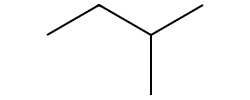

In [8]:
# Let's load a simple structure of 2-methylbutane
pugin   = "compound/name/2-methylbutane"
url     = "/".join( [pugrest, pugin, pugoper, pugout] )
res = requests.get(url)
print("The SMILES string for 2-methylbutane is:", res.text)
mol = Chem.MolFromSmiles(res.text) # create a molecule object from the SMILES string
IPythonConsole.molSize = 250, 100 # set the size of the image

mol

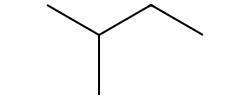

In [9]:
# Let's load another SMILES string for 2-methylbutane
smiles = "CC(C)CC"
mol = Chem.MolFromSmiles(smiles)
mol

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong><br>

Using your knowledge of SMILES, generate the SMILES string for 2,3-dimethylpentane and display the molecule in the code cell below.

Compare your SMILES string to what is in the PubChem Database.




<details>
<summary>Solution</summary>
CC(C)C(C)CC and CCC(C)C(C)C would be valid SMILES for 2,3-dimethylpentane

</div>

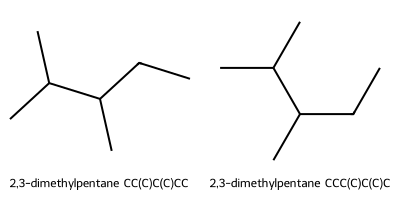

In [10]:
# write your code here to display the molecule
smiles1 = "CC(C)C(C)CC"
smiles2 = "CCC(C)C(C)C"
mols = [Chem.MolFromSmiles(smiles1), Chem.MolFromSmiles(smiles2)] 
myLegends = ["2,3-dimethylpentane CC(C)C(C)CC ", "2,3-dimethylpentane CCC(C)C(C)C"]

img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200,200), legends=myLegends)
display(img)

In this next section, we will display three stuctures of toluene.

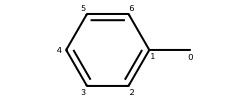

In [11]:
# Let's load a simple structure of Toluene
smiles1 = "Cc1ccccc1"
mol = Chem.MolFromSmiles(smiles1)
IPythonConsole.drawOptions.addAtomIndices = True
mol

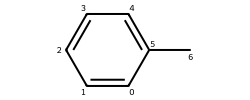

In [12]:
# Let's load a simple structure of Toluene
smiles2 = "c1ccccc1C"
mol = Chem.MolFromSmiles(smiles2)
mol

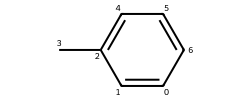

In [13]:
# Let's load a simple structure of Toluene
smiles3 = "c1cc(C)ccc1"
mol = Chem.MolFromSmiles(smiles3)
mol

In [14]:
print("Checking to see if SMILES are identical")
if smiles1 != smiles2:
    print(f"The SMILES strings are different:\n  SMILES 1: {smiles1}\n  SMILES 2: {smiles2}")
else:
    print(f"The SMILES strings are the same: {smiles1}")
if smiles1 != smiles3:
    print(f"The SMILES strings are different:\n  SMILES 1: {smiles1}\n  SMILES 2: {smiles3}")
else:
    print(f"The SMILES strings are the same: {smiles2}")
if smiles2 != smiles3:
    print(f"The SMILES strings are different:\n  SMILES 1: {smiles2}\n  SMILES 3: {smiles3}")
else:
    print(f"The SMILES strings are the same: {smiles3}")

    

Checking to see if SMILES are identical
The SMILES strings are different:
  SMILES 1: Cc1ccccc1
  SMILES 2: c1ccccc1C
The SMILES strings are different:
  SMILES 1: Cc1ccccc1
  SMILES 2: c1cc(C)ccc1
The SMILES strings are different:
  SMILES 1: c1ccccc1C
  SMILES 3: c1cc(C)ccc1


Let's explore how the SMILES for Toluene is stored in PubChem:

The PubChem SMILES string for toluene is: CC1=CC=CC=C1



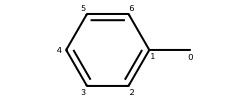

In [15]:
pugin   = "compound/name/toluene"
url     = "/".join( [pugrest, pugin, pugoper, pugout] )
res = requests.get(url)
print("The PubChem SMILES string for toluene is:", res.text)
PubChemSMILES = res.text.strip()  # remove any trailing newline characters
mol = Chem.MolFromSmiles(PubChemSMILES) # create a molecule object from the SMILES string
IPythonConsole.molSize = 250, 100 # set the size of the image
IPythonConsole.drawOptions.addAtomIndices = True
mol

The PubChem SMILES string for methylcyclohexane is: CC1CCCCC1



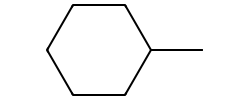

In [16]:
pugin   = "compound/name/methylcyclohexane"
url     = "/".join( [pugrest, pugin, pugoper, pugout] )
res = requests.get(url)
print("The PubChem SMILES string for methylcyclohexane is:", res.text)
PubChemSMILES = res.text.strip()  # remove any trailing newline characters
mol = Chem.MolFromSmiles(PubChemSMILES) # create a molecule object from the SMILES string
IPythonConsole.molSize = 250, 100 # set the size of the image
IPythonConsole.drawOptions.addAtomIndices = False
mol

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong><br>
- In the toluene SMILES examples, are the SMILES different?<br>
- How are aromatic carbons shown in SMILES notation? Is there more than one way?<br>
- How is the SMILES for methylcyclohexane different from toluene?<br>
- In the toluene SMILES examples, does RDKit generate different structures?<br>
- What do you notice about the atom index numbers in the toluene structure output?<br>
- What can you anticipate being an issue for storing SMILES strings in a database?

</div>



While SMILES is widely used, it’s important to know that the original Daylight SMILES format is proprietary and maintained by Daylight Chemical Information Systems. Over time, other organizations and toolkits, such as OpenEye, OpenSMILES and RDKit, have implemented their own versions of SMILES, each with slight differences in syntax rules, aromaticity perception, or handling of tautomers. This means that the same molecule may be represented by different SMILES strings depending on the software generating it. So while SMILES is a powerful and convenient representation, it’s not always perfectly standardized across platforms. This is important to keep in mind when working with multiple tools or databases.

### Exploring Bonds, Atoms and Stereochemistry

In SMILES notation, molecules are built from atoms and the bonds that connect them, using a set of straightforward rules and symbols. 


In [17]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/cid/84682,444683,5247073,7045591,517045,5326161,5326160,12732"
pugoper = "property/IUPACName,ConnectivitySMILES,SMILES"
pugout  = "csv"

url = "/".join( [pugrest, pugin, pugoper, pugout] )   # Construct the URL
res = requests.get(url)
print(res.text)


"CID","IUPACName","ConnectivitySMILES","SMILES"
84682,"(2R)-butan-2-ol","CCC(C)O","CC[C@@H](C)O"
444683,"(2S)-butan-2-ol","CCC(C)O","CC[C@H](C)O"
5247073,"butan-2-ylazanium","CCC(C)[NH3+]","CCC(C)[NH3+]"
7045591,"[(2R)-butan-2-yl]azanium","CCC(C)[NH3+]","CC[C@@H](C)[NH3+]"
517045,"sodium;acetate","CC(=O)[O-].[Na+]","CC(=O)[O-].[Na+]"
5326161,"(E)-pent-2-ene","CCC=CC","CC/C=C/C"
5326160,"(Z)-pent-2-ene","CCC=CC","CC/C=C\C"
12732,"hex-1-yne","CCCCC#C","CCCCC#C"



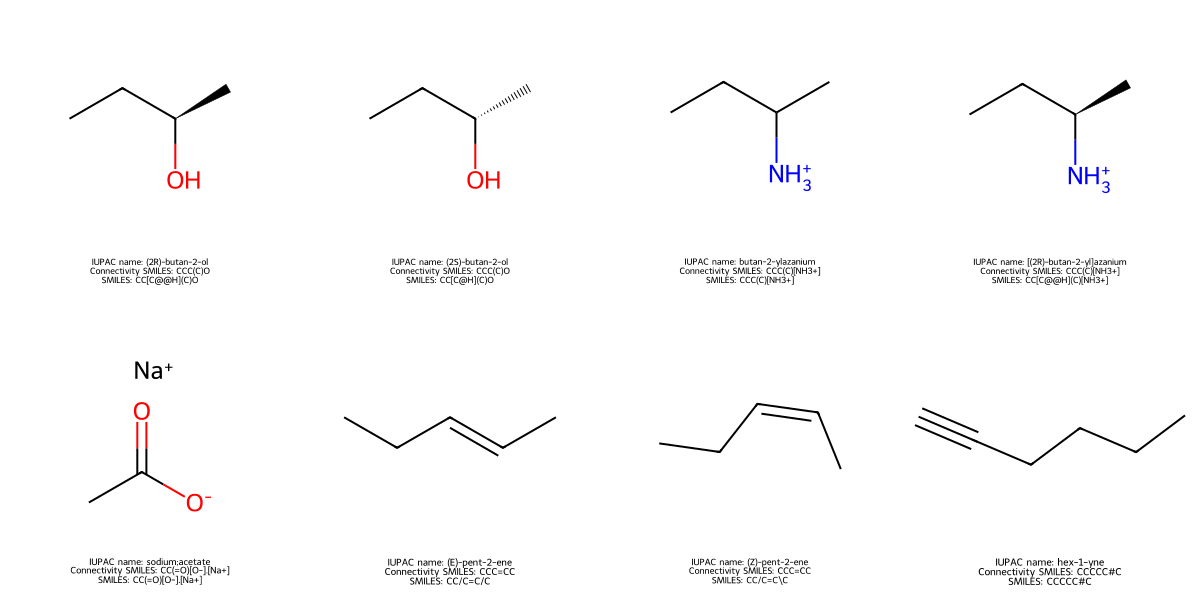

In [20]:
import csv
from io import StringIO


# Step 2: Parse CSV data
csv_text = res.text
csv_reader = csv.DictReader(StringIO(csv_text)) # Create a CSV reader object with dictionary output

# Step 3: Extract molecule objects and legends
mols = []
legends = []

for row in csv_reader:
    smiles = row["SMILES"]
    conn_smiles = row["ConnectivitySMILES"]
    name = row["IUPACName"]

    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mols.append(mol)
        legend = f"IUPAC name: {name}\nConnectivity SMILES: {conn_smiles}\nSMILES: {smiles}"
        legends.append(legend)

# Step 4: Draw molecules in a 2x2 grid
IPythonConsole.drawOptions.addAtomIndices = False
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300, 300), legends=legends)
img

asxcasxc

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong><br>
- What ASCII characters are used to indicate double and triple bonds in SMILES strings?<br>
- What ASCII characters are used to indicate stereogenic centers and geometric isomers?<br>
- How are charged species accounted for in SMILES strings?<br>
- How are salts accounted for in SMILES strings?<br>
- Why is it important for chemical databases to store isomeric SMILES in addition to connectivity SMILES? What types of structural information are captured in isomeric SMILES that are lost in connectivity-only representations?
</div>


RDKit also allows for the assigning of absolute stereochemistry of a molecule. Looking at @ or @@ for chiral centers or / or \ for double bonds isn't very helpful. 

RDKit `Chem.FindMolChiralCenters` method identifies all chiral centers and indicates the atom number where found. Keep in mind this is RDKit numbering and not IUPAC numbering.

To obtain the stereochemistry of double bonds, we can iterate through the bonds and obtain the stereochemistry using the GetStereo() bond method as shown in the following code cell. There are three possible outputs list below.

|Output|Description|
|------|-----------|
|STEREONONE|	No stereochemistry (often not a double bond)|
|STEREOE|	*E* stereochemistry|
|STEREOZ|	*Z* stereochemistry|

[(1, 'S')]
STEREONONE
STEREONONE
STEREONONE
STEREOE
STEREONONE


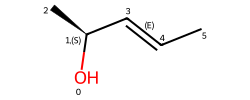

In [21]:
pentenol = Chem.MolFromSmiles('O[C@@H](C)/C=C/C')
print(Chem.FindMolChiralCenters(pentenol))

for bond in pentenol.GetBonds():
    print(bond.GetStereo())

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True
pentenol

The printed output above is messy as it is telling us the streochemistry at each bond. The following code is cleaner as it only tells us the stereochemistry at any double bonds and where they are:

In [22]:
for bond in pentenol.GetBonds():
    if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
        stereo = bond.GetStereo()
        print(f"Bond between atoms {bond.GetBeginAtomIdx()} and {bond.GetEndAtomIdx()}")
        print(f"Stereo type: {stereo}")


Bond between atoms 3 and 4
Stereo type: STEREOE


<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong><br>
The code cell below sends a PUG REST request to retrieve a compound from PubChem using its CID.

Your task: Write code that prints out absolute configuration of all stereogenic centers and double bond stereochemistry (*E/Z*) in text format, and also displays this information visually on the molecule image.

Pay special attention to the double bonds between **atoms 1 and 2** and **atoms 21 and 22**. Your output should clearly indicate whether each of these bonds is assigned *E* (*trans*), *Z* (*cis*), or if no stereochemistry is defined. Be prepared to explain why RDKit provides the output you received.
</div>

[]
Bond between atoms 1 and 2
Stereo type: STEREONONE
Bond between atoms 9 and 10
Stereo type: STEREOE
Bond between atoms 11 and 12
Stereo type: STEREOE
Bond between atoms 13 and 14
Stereo type: STEREOZ
Bond between atoms 21 and 22
Stereo type: STEREONONE
Bond between atoms 24 and 25
Stereo type: STEREOZ
Bond between atoms 26 and 27
Stereo type: STEREONONE


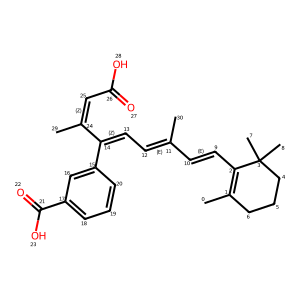

In [23]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/cid/6438744"
pugoper = "property/SMILES"
pugout  = "txt"
url     = "/".join( [pugrest, pugin, pugoper, pugout] )
res = requests.get(url)
mol = Chem.MolFromSmiles(res.text.strip()) # create a molecule object from the SMILES string

#Write your code here to display the molecule and the stereochemistry

print(Chem.FindMolChiralCenters(mol))

for bond in mol.GetBonds():
    if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
        stereo = bond.GetStereo()
        print(f"Bond between atoms {bond.GetBeginAtomIdx()} and {bond.GetEndAtomIdx()}")
        print(f"Stereo type: {stereo}")
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True
IPythonConsole.molSize = 300, 300 # set the size of the image
mol

### Exploring Connection Tables

A connection table is a tabular representation that lists atoms and the bonds between them. This structure forms the backbone of many molecular file formats and is critical for understanding how software interprets molecular topology.


     RDKit          2D

 10  9  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.7500    0.0000 N   0  0  0  0  0  4  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981    1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0490   -0.5490    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5490    2.0490    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    3.3481    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5490    4.6471    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    5.9462    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7990    5.9462    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5490    7.2452    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  1  4  1  0
  1  5  1  0
  5  6  1  0
  6  7  1  0
  7  8  1  0
  8  9  2  0
  8 10  1  0
M  CHG  1   1   1
M  END



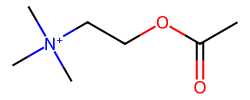

In [24]:
# Convert SMILES to RDKit molecule object
acetylcholine = "[N+](C)(C)(C)CCOC(=O)C" #acetylcholine (a neurotransmitter)
mol = Chem.MolFromSmiles(acetylcholine)

# Check if the molecule was successfully created
if mol:
    # Convert the molecule object to a MOL block
    mol_block = Chem.MolToMolBlock(mol)

    # Print the MOL block
    print(mol_block)

    # Optionally, write the MOL block to a file
    with open("acetylcholine.mol", "w") as f:
        f.write(mol_block)
else:
    print("Error: Could not create molecule from SMILES string.")
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.molSize = 250, 100 # set the size of the image
mol

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

* Based on the output, is the MOL file a 2D or 3D structure? (There are two different ways you can tell.)
* How many atoms are in molecule? What two ways can you determine this?
* How many bonds are in the molecule? What two ways can you determine this?
* Which atoms are explicit? Which atoms are implied?
* Identify the Atom Block in the MOL file.
* Identify the Bond Block in the MOL file.
* How is bond order indicated in the Bond Block?
* How is charge indicated in the MOL file?
* Check your local directory, is there a file named molecule.mol? Open it with a text editor to view.

Change the code above to display atom indices for the displayed molecule. How do the atom indices in the mol file compare to the diplayed molecule?
</div>

Why do my numbers in the mol file differ from the image?

`MolFromSmiles()` and RDKit's internal API (e.g., `atom.GetIdx()`) use zero-based indexing (starts at 0), like Python.

`MolToMolBlock()` produces a `MolBlock` in CTfile format, which follows the Molfile V2000/V3000 standard, and uses one-based indexing (starts at 1).

If we wanted to create a workaround so that the numbers matched, we would adjust the numbers by creating new atom numbers:

```python
# Create labels with 1-based indexing
atom_labels = {atom.GetIdx(): str(atom.GetIdx() + 1) for atom in mol.GetAtoms()}
```

### 3D Mol Files
SMILES strings are great for capturing the basics of a molecule (such as atom types, bonding patterns, formal charges, and stereochemistry) but they only represent 2D connectivity. Even when you convert a SMILES to a Mol object and generate a mol file, you'll notice that the coordinate section often includes only X and Y values, with all Z-coordinates set to 0. That’s because SMILES doesn’t encode 3D geometry.

To generate 3D coordinates, RDKit can apply molecular mechanics methods such as the Universal Force Field (UFF) or Merck Molecular Force Field (MMFF). These algorithms estimate a three-dimensional structure by minimizing molecular strain. Keep in mind, though, that while these methods provide reasonable 3D conformations, they don’t always yield the lowest-energy conformation. For many applications, they’re good enough. For more rigorous modeling further optimization or conformer sampling may be necessary.

In [25]:
from rdkit.Chem import AllChem
acetylcholine = "[N+](C)(C)(C)CCOC(=O)C"  # same as before, but now we will generate 3D coordinates
# Generate molecule from SMILES 
mol = Chem.MolFromSmiles(acetylcholine)

# Add explicit hydrogens for a proper 3D structure 
mol_h = Chem.AddHs(mol)

# Generate initial 3D coordinates (embedded in molecule object) 
AllChem.EmbedMolecule(mol_h, AllChem.ETKDG())

# Optimize geometry using UFF force field (can also use MMFF94 if available) 
AllChem.UFFOptimizeMolecule(mol_h)

# Get optimized coordinates as MolBlock (optional, for visualization or output) 
optimized_molblock = Chem.MolToMolBlock(mol_h)
print(optimized_molblock)


     RDKit          3D

 26 25  0  0  0  0  0  0  0  0999 V2000
   -1.4885    0.3986    0.4363 N   0  0  0  0  0  4  0  0  0  0  0  0
   -2.0131    0.4879   -0.9479 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7807    1.6780    1.1279 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1827   -0.6920    1.1628 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0065    0.2003    0.4423 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4868   -1.1015   -0.2266 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.9092   -1.1826   -0.1520 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.7677   -0.4447   -0.9748 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3109    0.2893   -1.8929 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.2425   -0.5745   -0.8000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4452    1.2374   -1.5431 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0852    0.7883   -0.9505 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9580   -0.4902   -1.4715 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2898    2.5339    0

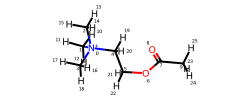

In [26]:
IPythonConsole.drawOptions.addAtomIndices = True
mol_h

#### Visualization with py3dmol

While a mol file and its static image can confirm the presence of 3D coordinates, chemists often want to visually explore the 3D structure itself. There are several tools available for rendering molecules in three dimensions. In this example we’ll use py3Dmol, which is a Python package that integrates seamlessly with Jupyter notebooks to provide interactive 3D molecular visualizations. It’s a convenient way to inspect geometry, stereochemistry, and conformational features directly within your workflow.

In [27]:
import py3Dmol
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (500, 500)
IPythonConsole.drawMol3D(mol_h)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

* Based on the output, is the MOL file a 2D or 3D structure? (There are two different ways you can tell.)
* Why are hydrogen atoms and bonds added to the molecule object?
* Does the 3D visualization indicate that bond lengths and angles have been properly calculated?
</div>

### Geometry Optimization

The `AllChem.EmbedMultipleConfs()` function in RDKit allows you to generate multiple 3D conformations of a molecule using distance geometry methods. By specifying the number of conformers and embedding parameters, RDKit creates several possible geometries that follow chemical rules.

The parameters are established using `ETKDGv3` which stands for *Experimental Torsion-angle preferences with Knowledge-based Distance Geometry, version 3*. It combines experimental data from crystal structures with knowledge-based rules to produce more realistic 3D conformers, particularly for molecules with flexible ring systems and rotatable bonds. These conformers are stored in the same molecule object and can be accessed, visualized, or optimized further for applications like docking or energy calculations.

In [28]:
# Step 1: Molecule preparation
acetylcholine = "[N+](C)(C)(C)CCOC(=O)C" 
mol = Chem.MolFromSmiles(acetylcholine)
mol = Chem.AddHs(mol)

In [29]:
# Step 2: Embed multiple conformations 
num_confs = 20 # Number of conformers to generate 
params = AllChem.ETKDGv3()
conformers = AllChem.EmbedMultipleConfs(mol, numConfs=num_confs, params=params)

In [30]:
# Step 3: Optimize each conformer and calculate energies 
energies = [] 
for conf_id in conformers: 
    # Geometry optimization using UFF (you could use MMFF as an alternative) 
    ff = AllChem.UFFGetMoleculeForceField(mol, confId=conf_id)
    #ff = AllChem.MMFFGetMoleculeForceField(mol, AllChem.MMFFGetMoleculeProperties(mol), confId=conf_id)
    ff.Minimize() 
    energy = ff.CalcEnergy() 
    energies.append((conf_id, energy))

In [31]:
# Step 4: Sort conformers by energy 
sorted_energies = sorted(energies, key=lambda x: x[1])

In [32]:
# Display energies 
print("Conformer ID : Energy (kcal/mol)") 
for conf_id, energy in sorted_energies: 
    print(f"{conf_id} : {energy:.4f}")

Conformer ID : Energy (kcal/mol)
13 : 22.4723
12 : 22.4723
9 : 22.4723
17 : 22.4723
19 : 22.4723
15 : 22.4723
6 : 22.4723
16 : 22.4723
3 : 23.3938
2 : 23.3938
4 : 23.3938
10 : 23.3938
14 : 23.4172
11 : 23.4172
8 : 23.4172
5 : 23.6085
1 : 23.6148
0 : 23.6148
7 : 24.5674
18 : 24.5900


In [33]:
# Get lowest-energy conformer ID 
global_min_id = sorted_energies[0][0] 
# Display global minimum structure as 3D depiction 
mol_global_min = Chem.Mol(mol, False, global_min_id) 
IPythonConsole.drawMol3D(mol, confId=global_min_id)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [34]:
print(global_min_id)

13


In [35]:
# Get highest-energy conformer ID 
sorted_energies = sorted(energies, key=lambda x: x[1], reverse=True) 
global_max_id = sorted_energies[0][0] # highest energy
# Display global minimum structure as 3D depiction 
mol_global_min = Chem.Mol(mol, False, global_max_id) 
IPythonConsole.drawMol3D(mol, confId=global_max_id)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
print(global_max_id)

In [36]:
# Get optimized coordinates as MolBlock (optional, for visualization or output) 
optimized_molblock = Chem.MolToMolBlock(mol_global_min)
    # Optionally, write the MOL block to a file
with open("optimized_acetylcholine.mol", "w") as f:
    f.write(optimized_molblock)

print(optimized_molblock)


     RDKit          3D

 26 25  0  0  0  0  0  0  0  0999 V2000
   -1.3777    0.0835    0.0987 N   0  0  0  0  0  4  0  0  0  0  0  0
   -0.7453   -1.1155    0.6981 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0500    0.8742    1.1589 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4118   -0.3698   -0.8641 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3853    0.9146   -0.6528 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8292    1.4212    0.1615 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7702    0.3790    0.4162 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.6334   -0.1390   -0.5555 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6584    0.3411   -1.7213 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.5011   -1.3030   -0.2181 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1516   -1.6743   -0.0596 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5122   -1.8079    1.1128 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0765   -0.8438    1.5427 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3611    1.1148    1

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

* Compare the lowest energy conformation to the highest energy conformation. Are they different?
* Rerun the above section with 100 conformers and the MMFF minimization method. 
* Are the results different? Do either the low or high energy conformation have a *gauche* or *anti* orientation sighting down the C-C bond?

</div>

In the previous code section, you wrote out the connection table as a mol file. In this section, let's read the file back in as a new variable and generate a SMILES string from it to compare to our previous SMILES string.

In [50]:
# loading the mol file we just saved

optimizedSavedMol = Chem.MolFromMolFile("optimized_acetylcholine.mol", removeHs=False)
molblockText = Chem.MolToMolBlock(optimizedSavedMol) # convert the mol object back to a mol block
print(molblockText)




     RDKit          3D

 26 25  0  0  0  0  0  0  0  0999 V2000
   -1.3777    0.0835    0.0987 N   0  0  0  0  0  4  0  0  0  0  0  0
   -0.7453   -1.1155    0.6981 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0500    0.8742    1.1589 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4118   -0.3698   -0.8641 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3853    0.9146   -0.6528 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8292    1.4212    0.1615 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7702    0.3790    0.4162 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.6334   -0.1390   -0.5555 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6584    0.3411   -1.7213 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.5011   -1.3030   -0.2181 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1516   -1.6743   -0.0596 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5122   -1.8079    1.1128 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0765   -0.8438    1.5427 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3611    1.1148    1

In [51]:
# generate a SMILES string from the optimized molecule
smiles_optimized = Chem.MolToSmiles(optimizedSavedMol)
print("SMILES string of the optimized molecule:", smiles_optimized) 

SMILES string of the optimized molecule: [H]C([H])([H])C(=O)OC([H])([H])C([H])([H])[N+](C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H]


In the above section, since we loaded the saved mol with explicit hydrogens by setting the parameter `removeHs=False` we get a SMILES string with all the hydrogens explicitly stated. The recommended approach is to remove explicit hydrogens from teh molecule before converting to SMILES as shown in the code cell below:

In [52]:
mol_optimized_noH = Chem.RemoveHs(optimizedSavedMol)  # remove explicit hydrogens
smiles_optimized_noH = Chem.MolToSmiles(mol_optimized_noH)  # generate SMILES without explicit hydrogens
print("SMILES string of the optimized molecule without explicit hydrogens:", smiles_optimized_noH)

SMILES string of the optimized molecule without explicit hydrogens: CC(=O)OCC[N+](C)(C)C


Previously, we used a provided SMILES string for acetylcholine. After generating and optimizing its 3D structure, we saved and reloaded the molecule, then generated a new SMILES string from the optimized structure. Let's check if the original and new SMILES strings look different. This is a good reminder that SMILES are not necessarily canonical by default. Let's confirm that both SMILES represent the same molecule by comparing their molecular graphs directly in RDKit.

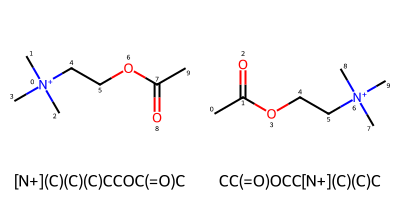

In [53]:
myLegends = [acetylcholine,smiles_optimized_noH]
mols = [Chem.MolFromSmiles(acetylcholine), Chem.MolFromSmiles(smiles_optimized_noH)] 
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200,200), legends=myLegends)
display(img)



### Resolving issues with SMILES by using InChI and InChiKey

The [InChI (International Chemical Identifier)](https://www.inchi-trust.org/) is a standardized, non-proprietary textual representation of a chemical substance developed by [IUPAC (International Union of Pure and Applied Chemistry)](https://iupac.org/). Unlike SMILES, which can vary depending on software or formatting choices, InChI is designed to be a unique and consistent way to encode a molecule’s structure. It includes layers of information (connectivity, hydrogen atoms, charge, stereochemistry, and isotopes) organized in a systematic, machine-readable format. While not particularly human-friendly, InChI is widely used for database indexing, structure matching, and ensuring reproducibility in chemical informatics.

RDKit can convert a molecule (`Mol` object) to an InChI string using the `MolToInchi()` function from the rdkit.Chem.inchi module. This allows you to generate a standardized, unique identifier directly from molecular structure data within your Python workflow.

In [54]:
# loading the optimized saved mol file of acetylcholine
optimizedSavedMol = Chem.MolFromMolFile("optimized_acetylcholine.mol", removeHs=False) 

# loading the original acetylcholine saved mol file
originalSavedMol = Chem.MolFromMolFile("acetylcholine.mol", removeHs=False)

# Generate InChi string for each molecule and display 
inchi_optimized = Chem.MolToInchi(optimizedSavedMol)
inchi_original = Chem.MolToInchi(originalSavedMol)
print("InChI of the optimized molecule:", inchi_optimized)
print("InChI of the original molecule: ", inchi_original)    

InChI of the optimized molecule: InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2,1-4H3/q+1
InChI of the original molecule:  InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2,1-4H3/q+1


We can also generate InChI from the two SMILES strings that we had for acetylcholine previously, however, we need to create an RDKit molecule object first.

In [55]:
mol_from_original_smiles = Chem.MolFromSmiles(acetylcholine)  # create a molecule object from the original SMILES string
mol_from_optimized_smiles = Chem.MolFromSmiles(smiles_optimized_noH)  # create a molecule object from the optimized SMILES string

inchi_from_original_smiles = Chem.MolToInchi(mol_from_original_smiles)
inchi_from_optimized_smiles = Chem.MolToInchi(mol_from_optimized_smiles)
print("InChI from original SMILES: ", inchi_from_original_smiles)
print("InChI from optimized SMILES:", inchi_from_optimized_smiles)  

InChI from original SMILES:  InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2,1-4H3/q+1
InChI from optimized SMILES: InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2,1-4H3/q+1


In [56]:
# output of all InChI strings to easily compare
print(inchi_optimized)
print(inchi_original)
print(inchi_from_original_smiles)
print(inchi_from_optimized_smiles)
    

InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2,1-4H3/q+1
InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2,1-4H3/q+1
InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2,1-4H3/q+1
InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2,1-4H3/q+1


<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

* If you start with different SMILES strings or MOL files that represent the same molecule, will the resulting InChI always be identical? Why or why not?
* How does storing molecular structures as InChI in a database help prevent errors or inconsistencies in chemical data management?
</div>

RDKit also allows for convenient interconversion of SMILES to InChI. Let's demonstrate this with ethanol.

In [57]:
# SMILES --> InChI
smiles = 'CCO' # ethanol  could also use C(O)C or OCC as alternatives SMILES for ethanol
mol = Chem.MolFromSmiles(smiles) # need to create a molecule object from the SMILES string
# Convert SMILES to InChI
inchi = Chem.MolToInchi(mol) 
print(inchi)


#InChI --> SMILES
inchi = 'InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3' # ethanol 
mol = Chem.MolFromInchi(inchi) # need to create a molecule object from the InChI string
# Convert InChI to SMILES 
smiles = Chem.MolToSmiles(mol) 
print(smiles)

InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3
CCO


InChIKey is a hashed, fixed-length version of the full InChI string, designed for easier searching, indexing, and data sharing. While InChI strings can be long and complex, the InChIKey condenses this information into a 27-character code that’s easier to use in databases, spreadsheets, and web searches. It’s not human-readable, but it allows for fast structure-based lookups and is commonly used as a stable chemical identifier across platforms.

 It consists of three blocks separated by hyphens. The first block (14 characters) encodes the main molecular skeleton, including atom types and connectivity. The second block (8 characters) captures stereochemistry and isotope information. The third block (1 character) indicates the protonation state or InChI version. 

Searching with full InChI strings or SMILES can be problematic, especially in web forms or databases that don’t handle special characters like slashes (/), backslashes (\), or plus signs (+) well. These characters can be misinterpreted by search engines or software, leading to errors or failed queries. The InChIKey solves this issue by providing a simplified, fixed-format identifier that avoids special characters, making it much more robust for searching, indexing, and sharing chemical information across platforms.

In [58]:
#InChI --> InChIKey
inchi = 'InChI=1S/C7H16NO2/c1-7(9)10-6-5-8(2,3)4/h5-6H2,1-4H3/q+1' # acetylcholine 
# create a molecule object from the InChI string
mol = Chem.MolFromInchi(inchi) 
# Convert InChI to InChIKey 
inchikey = Chem.InchiToInchiKey(inchi) 
print(inchikey)

OIPILFWXSMYKGL-UHFFFAOYSA-N


It’s important to note that the InChIKey is a one-way encrypted representation of the full InChI. It’s designed for compact identification, not reconstruction. This means you can’t convert an InChIKey back into the original chemical structure or InChI string directly. Instead, it serves as a reliable, searchable fingerprint for matching or referencing molecules across databases. If you need the full structural details, you must store or retrieve the original InChI or another structure-based format alongside the InChIKey.

Let's look at our original saved MOL file of acetylcholine wtih 2D coordinates and our optimized saved MOL file with 3D coordinates.

In [59]:
# loading the optimized saved mol file of acetylcholine
optimizedSavedMol = Chem.MolFromMolFile("optimized_acetylcholine.mol", removeHs=False) 

# loading the original acetylcholine saved mol file
originalSavedMol = Chem.MolFromMolFile("acetylcholine.mol", removeHs=False)

# Generate InChi string for each molecule and display
inchikey_optimized = Chem.MolToInchiKey(optimizedSavedMol)
inchikey_original = Chem.MolToInchiKey(originalSavedMol)
print("InChIKey of the optimized molecule:", inchikey_optimized)
print("InChIKey of the original molecule: ", inchikey_original)


InChIKey of the optimized molecule: OIPILFWXSMYKGL-UHFFFAOYSA-N
InChIKey of the original molecule:  OIPILFWXSMYKGL-UHFFFAOYSA-N


Notice that the two MOL files provide the same InChIKey as there is no coordinate data provided in the InChIKey, only atom types connectivity in the main section as shown with `OIPILFWXSMYKGL` and no stereochemistry data in the second block as shown with `UHFFFAOYSA`. 

Let's look at molecules with stereochemical data included (or not). The following shows tartaric acid which has two stereogenic centers.

InChIKey of L-tartaric acid:       FEWJPZIEWOKRBE-JCYAYHJZSA-N
InChIKey of D-tartaric acid:       FEWJPZIEWOKRBE-LWMBPPNESA-N
InChIKey of racemic tartaric acid: FEWJPZIEWOKRBE-UHFFFAOYSA-N


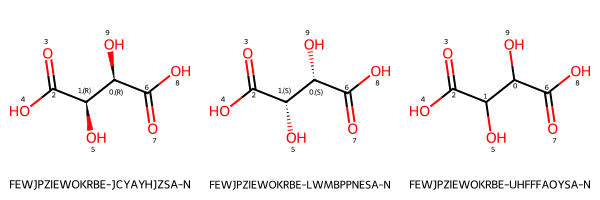

In [60]:
Ltartaric_acid = "[C@@H]([C@H](C(=O)O)O)(C(=O)O)O"
Dtartaric_acid = "[C@H]([C@@H](C(=O)O)O)(C(=O)O)O"
racemic_tartaric_acid = "C(C(C(=O)O)O)(C(=O)O)O"

mol_L = Chem.MolFromSmiles(Ltartaric_acid)
mol_D = Chem.MolFromSmiles(Dtartaric_acid)
mol_racemic = Chem.MolFromSmiles(racemic_tartaric_acid) 

inchikey_L = Chem.MolToInchiKey(mol_L)
inchikey_D = Chem.MolToInchiKey(mol_D)
inchikey_racemic = Chem.MolToInchiKey(mol_racemic)

print("InChIKey of L-tartaric acid:      ", inchikey_L)
print("InChIKey of D-tartaric acid:      ", inchikey_D)
print("InChIKey of racemic tartaric acid:", inchikey_racemic)


myLegends = [inchikey_L, inchikey_D, inchikey_racemic]
mols = [Chem.MolFromSmiles(Ltartaric_acid), Chem.MolFromSmiles(Dtartaric_acid), Chem.MolFromSmiles(racemic_tartaric_acid)] 
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=myLegends)
display(img)

InChIKey of L-tartrate:      FEWJPZIEWOKRBE-JCYAYHJZSA-L
InChIKey of L-tartaric acid: FEWJPZIEWOKRBE-JCYAYHJZSA-N


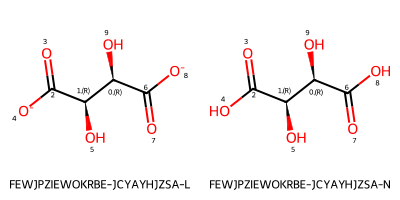

In [61]:
Ltartrate = Chem.MolFromSmiles("[C@@H]([C@H](C(=O)[O-])O)(C(=O)[O-])O")
inchikey_Ltartrate = Chem.MolToInchiKey(Ltartrate)

print("InChIKey of L-tartrate:     ", inchikey_Ltartrate)
print("InChIKey of L-tartaric acid:", inchikey_L)

myLegends = [inchikey_Ltartrate, inchikey_L]
mols = [Ltartrate,mol_L] 
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200,200), legends=myLegends)
display(img)

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong>

1) The first block of the InChIKey encodes the molecular skeleton (connectivity). Which of the tartaric acid forms share this same first block, and what does that tell you about their atomic connectivity?

2) The second block encodes stereochemistry and isotopes. How does this block differ between L-, D-, and racemic tartaric acid? What does this suggest about the presence or absence of defined stereochemistry?

3) Compare the InChIKeys of L-tartaric acid and L-tartrate. Which part(s) of the InChIKey change, and how does this reflect differences in protonation or formal charge?

4) If two molecules have identical first blocks but different second or third blocks, what kinds of chemical differences does that imply?

5) Why might using the InChIKey be more helpful than using SMILES when comparing stereoisomers in a chemical database?


In this notebook we loaded InChIs and SMILES into RDKit `mol` objects. This was required to interconvert them. Let's try one last bit of code that will result in an error. We are going to attempt to read an InChiKey in into a `mol` object. This should result in an error.

In [ ]:
# Try to create a molecule from InChIKey
mol_from_key = Chem.MolFromInchi(inchikey_Ltartrate)
print(mol_from_key)

<div class="alert alert-block alert-success">
<center><H1>Homework</H1></center>

Using the [PubChem Draw Structure Utility](https://pubchem.ncbi.nlm.nih.gov/#draw=true) draw a molecule that has:

* an aromatic heterocycle,
* 5 rotatable bonds,
* at least one *E* or *Z* double bond,
* at least one chiral center,
* a deprotonated carboxylic acid or a protonated amine.

In the drawing window, PubChem will generate the InChI for you. Copy and paste this into a variable called `myInChI`.

You will be writing code to:
1) Generate a mol object from your `mySMILES` variable
2) Generate a skeletal drawing from your mol object with atom indices
3) List stereochemistry for any chiral centers and double bonds
4) Generate a 2D connection table for your molecule and save it as `myMolecule.mol`
5) Utilizing UFF, optimize the geometry of your molecule and generate a mol block (SDF output/mol file)
6) Generate 100 conformers of your molecule
7) Display the lowest energy conformation as a rotatable 3D visualization
8) Save the lowest energy conformation MOL file as `myLowestConformation.mol`
9) Load the lowest energy conformation MOL file as a new variable called `savedMOL`
10) Generate and print SMILES (no hydrogens), InChI and InChiKey line notations for your molecule stored in `savedMOL` 

In [ ]:
# 1) Generate a mol object from your `mySMILES` variable
myInChI = ""




In [ ]:
# 2) Generate a skeletal drawing from your mol object with atom indices


In [ ]:
# 3) List stereochemistry for any chiral centers and double bonds




In [ ]:
# 4) Generate a 2D connection table for your molecule and save it as `myMolecule.mol`


In [ ]:
# 5) Using UFF, optimize the geometry of your molecule and generate a mol block (SDF output/mol file)



In [ ]:
# 6) Generate 100 conformers of your molecule
    


In [ ]:
# 7) Display the lowest energy conformation as a rotatable 3D visualization



In [ ]:
# 8) Save the lowest energy conformation MOL file as `myLowestConformation.mol`

    

In [ ]:
# 9) Load the lowest energy conformation MOL file as a new variable called `savedMOL`



In [ ]:
#10) Generate and print SMILES (no hydrogens), InChI and InChiKey line notations for your molecule stored in `savedMOL`


# Acknowledgments

